# Multi-Class classification with PyTorch

Using the Iris dataset, containing four numerical features and class labels, use PyTorch library to identify the type of iris flower - **Iris Setosa**, **Iris Versicolor** or **Iris Viriginica**. No data preparation is needed as the dataset is simple to understand, clean, and ready for supervised machine-learning classification. Due to the small size of the dataset, it makes visualizing the network easier.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
iris = pd.read_csv('data/iris.csv')

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
# Small dataset, well-balanced

iris.shape

(150, 5)

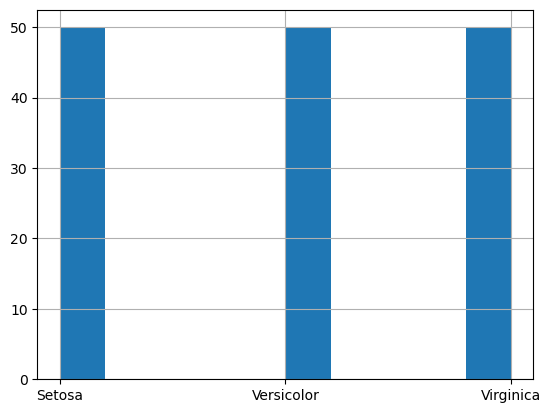

In [9]:
iris['variety'].hist();

**The `torch.tensor()` function converts the features and target labels to tensor matrices for use in neural network:**

    0 - Setosa
    1 - Versicolor
    2 - Virginica
    
**Technically, you should always train-test-split your data but since it is so small, use the whole dataset to train the model.**

In [10]:
X = torch.tensor(iris.drop("variety", axis=1).values, dtype=torch.float)

y = torch.tensor([0 if vty == "Setosa" else 1 if vty == "Versicolor" else 2 for vty in iris["variety"]], dtype=torch.long)

# Print 1st three rows of X and Y tensors (all belong to Setosa)
print(X[:3])
print()
print(y[:3])

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000]])

tensor([0, 0, 0])


**The data is now ready to be passed into the neural network.**

**The neural network will have an 'inner layer' going from 4 features to 16 nodes in one 'hidden layer', and an 'outer layer' going from the 16 nodes to 3 class probabilities, using ReLU activation function.**

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(in_features=4, out_features=16)
        self.hidden_1 = nn.Linear(in_features=16, out_features=16)
        self.output = nn.Linear(in_features=16, out_features=3)
        
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden_1(x))
        return self.output(x)
    

In [12]:
# Instantiate model Class instance
model = Net()

# View model summary
print(model)

Net(
  (input): Linear(in_features=4, out_features=16, bias=True)
  (hidden_1): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=3, bias=True)
)


In [13]:
# Calculate prediction probabilities for input data

preds = model(X)

In [15]:
# Visually, all second probabilities are highest, i.e. index position 1

preds[:3]

tensor([[-0.3579,  0.0725, -0.0341],
        [-0.3206,  0.0958, -0.0769],
        [-0.3395,  0.0879, -0.0453]], grad_fn=<SliceBackward0>)

In [ ]:
# ------------------------- Exact same code for Class model as above (only variable names have changed) -----------------------

In [16]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=4, out_features=16)
        self.fc2 = nn.Linear(in_features=16, out_features=16)
        self.output = nn.Linear(in_features=16, out_features=3)
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

In [17]:
# Instantiate model Class instance
model_b = ANN()

# View model summary
print(model_b)

ANN(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=3, bias=True)
)


In [18]:
# Set Criterion: To measure loss, use CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Set Optimizer: Use Adam with a learning rate of 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [19]:
# Train model

%%time

epochs = 100
loss_arr = []

for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    loss_arr.append(loss)
    
 
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch: 0 Loss: 1.1742950677871704
Epoch: 10 Loss: 0.9490728974342346
Epoch: 20 Loss: 0.6431766152381897
Epoch: 30 Loss: 0.4071611762046814
Epoch: 40 Loss: 0.31080693006515503
Epoch: 50 Loss: 0.21387919783592224
Epoch: 60 Loss: 0.134927898645401
Epoch: 70 Loss: 0.09368018060922623
Epoch: 80 Loss: 0.07427272945642471
Epoch: 90 Loss: 0.06395182013511658
CPU times: total: 375 ms
Wall time: 214 ms


In [31]:
# That was fast! But it is very small dataset

loss_arr[:3]

[tensor(1.1743, grad_fn=<NllLossBackward0>),
 tensor(1.1109, grad_fn=<NllLossBackward0>),
 tensor(1.0826, grad_fn=<NllLossBackward0>)]

In [ ]:
# To view the neural network, use TensorBoard (matplotlib does not work with tensors)

In [32]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter("torchlogs/")

writer.add_graph(model_b, X)

writer.close()

**Launch TensorBoard from Anaconda command terminal by navigating to the log directory (look in your working folder):**

    cd torchlogs
    tensorboard --logdir=./
    
**You’ll be able to see the model graph on http://localhost:6006**